# Preparacíon de los Datos

## Extracción del Archivo Tratrado

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, RocCurveDisplay, roc_auc_score, roc_curve

datos = pd.read_csv('https://raw.githubusercontent.com/adromass/Challenge_Telecom_X/refs/heads/main/Normalizado_Challenge_Telecom_X.csv')
datos.sample(3)

,id_cliente,abandono,genero,ciudadano_senior,pareja,dependientes,antiguedad_meses,servicio_telefono,multiples_lineas,servicio_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,contrato,factura_sin_papel,metodo_pago,cargo_mensual,cargo_total,cuentas_diarias
4452,6278-FEPBZ,0,0,0,0,0,9,1,0,0,...,0,0,0,0,Month-to-month,0,Mailed check,20.25,186.15,0.675000
1772,2589-AYCRP,0,0,0,0,0,50,1,0,0,...,0,0,0,0,One year,0,Bank transfer (automatic),19.75,989.05,0.658333
1530,2237-ZFSMY,1,0,0,0,0,39,1,0,1,...,1,1,1,0,One year,1,Electronic check,95.55,3692.85,3.185000


## Eliminación de Columnas Irrelevantes

In [43]:
datos.drop('id_cliente', axis=1, inplace=True)


## Encoding

In [44]:
datos_encoding = pd.get_dummies(datos, columns=["metodo_pago"], drop_first=True, dtype=int)
datos_encoding = pd.get_dummies(datos_encoding, columns=["contrato"], drop_first=True, dtype=int)
#datos_encoding["contrato"] = np.where(datos_encoding["contrato"] == "Month-to-month", 0, 1)
datos_encoding.columns

Index(['abandono', 'genero', 'ciudadano_senior', 'pareja', 'dependientes',
       'antiguedad_meses', 'servicio_telefono', 'multiples_lineas',
       'servicio_internet', 'tiene_dsl', 'tiene_fibra_optica',
       'seguridad_online', 'backup_online', 'proteccion_dispositivo',
       'soporte_tecnico', 'streaming_tv', 'streaming_peliculas',
       'factura_sin_papel', 'cargo_mensual', 'cargo_total', 'cuentas_diarias',
       'metodo_pago_Credit card (automatic)', 'metodo_pago_Electronic check',
       'metodo_pago_Mailed check', 'contrato_One year', 'contrato_Two year'],
      dtype='object')

## Verificación de la Proporción de Cancelación (abandono)

In [45]:
datos.value_counts('abandono', normalize=True).round(4)*100

abandono
0    73.46
1    26.54
Name: proportion, dtype: float64

## Normalización o Estandarización

In [46]:
columnas_numericas = ['antiguedad_meses', 'cargo_mensual', 'cargo_total','cuentas_diarias']
datos_encoding_normalizado = datos_encoding.copy()
datos_encoding_normalizado[columnas_numericas] = MinMaxScaler().fit_transform(datos_encoding_normalizado[columnas_numericas])

datos_encoding_normalizado.sample(3)

,abandono,genero,ciudadano_senior,pareja,dependientes,antiguedad_meses,servicio_telefono,multiples_lineas,servicio_internet,tiene_dsl,...,streaming_peliculas,factura_sin_papel,cargo_mensual,cargo_total,cuentas_diarias,metodo_pago_Credit card (automatic),metodo_pago_Electronic check,metodo_pago_Mailed check,contrato_One year,contrato_Two year
1848,1,1,0,1,0,0.402778,1,1,1,0,...,0,1,0.658706,0.284071,0.658706,0,1,0,0,0
5030,0,1,0,1,1,0.916667,1,0,0,0,...,0,1,0.020896,0.156538,0.020896,0,1,0,1,0
6698,1,1,0,1,1,0.250000,1,0,1,0,...,1,0,0.765174,0.204950,0.765174,0,0,1,0,0


# Correlación y Selección de Variables

## Análisis de Correlación

In [47]:
corr = datos_encoding_normalizado.corr()

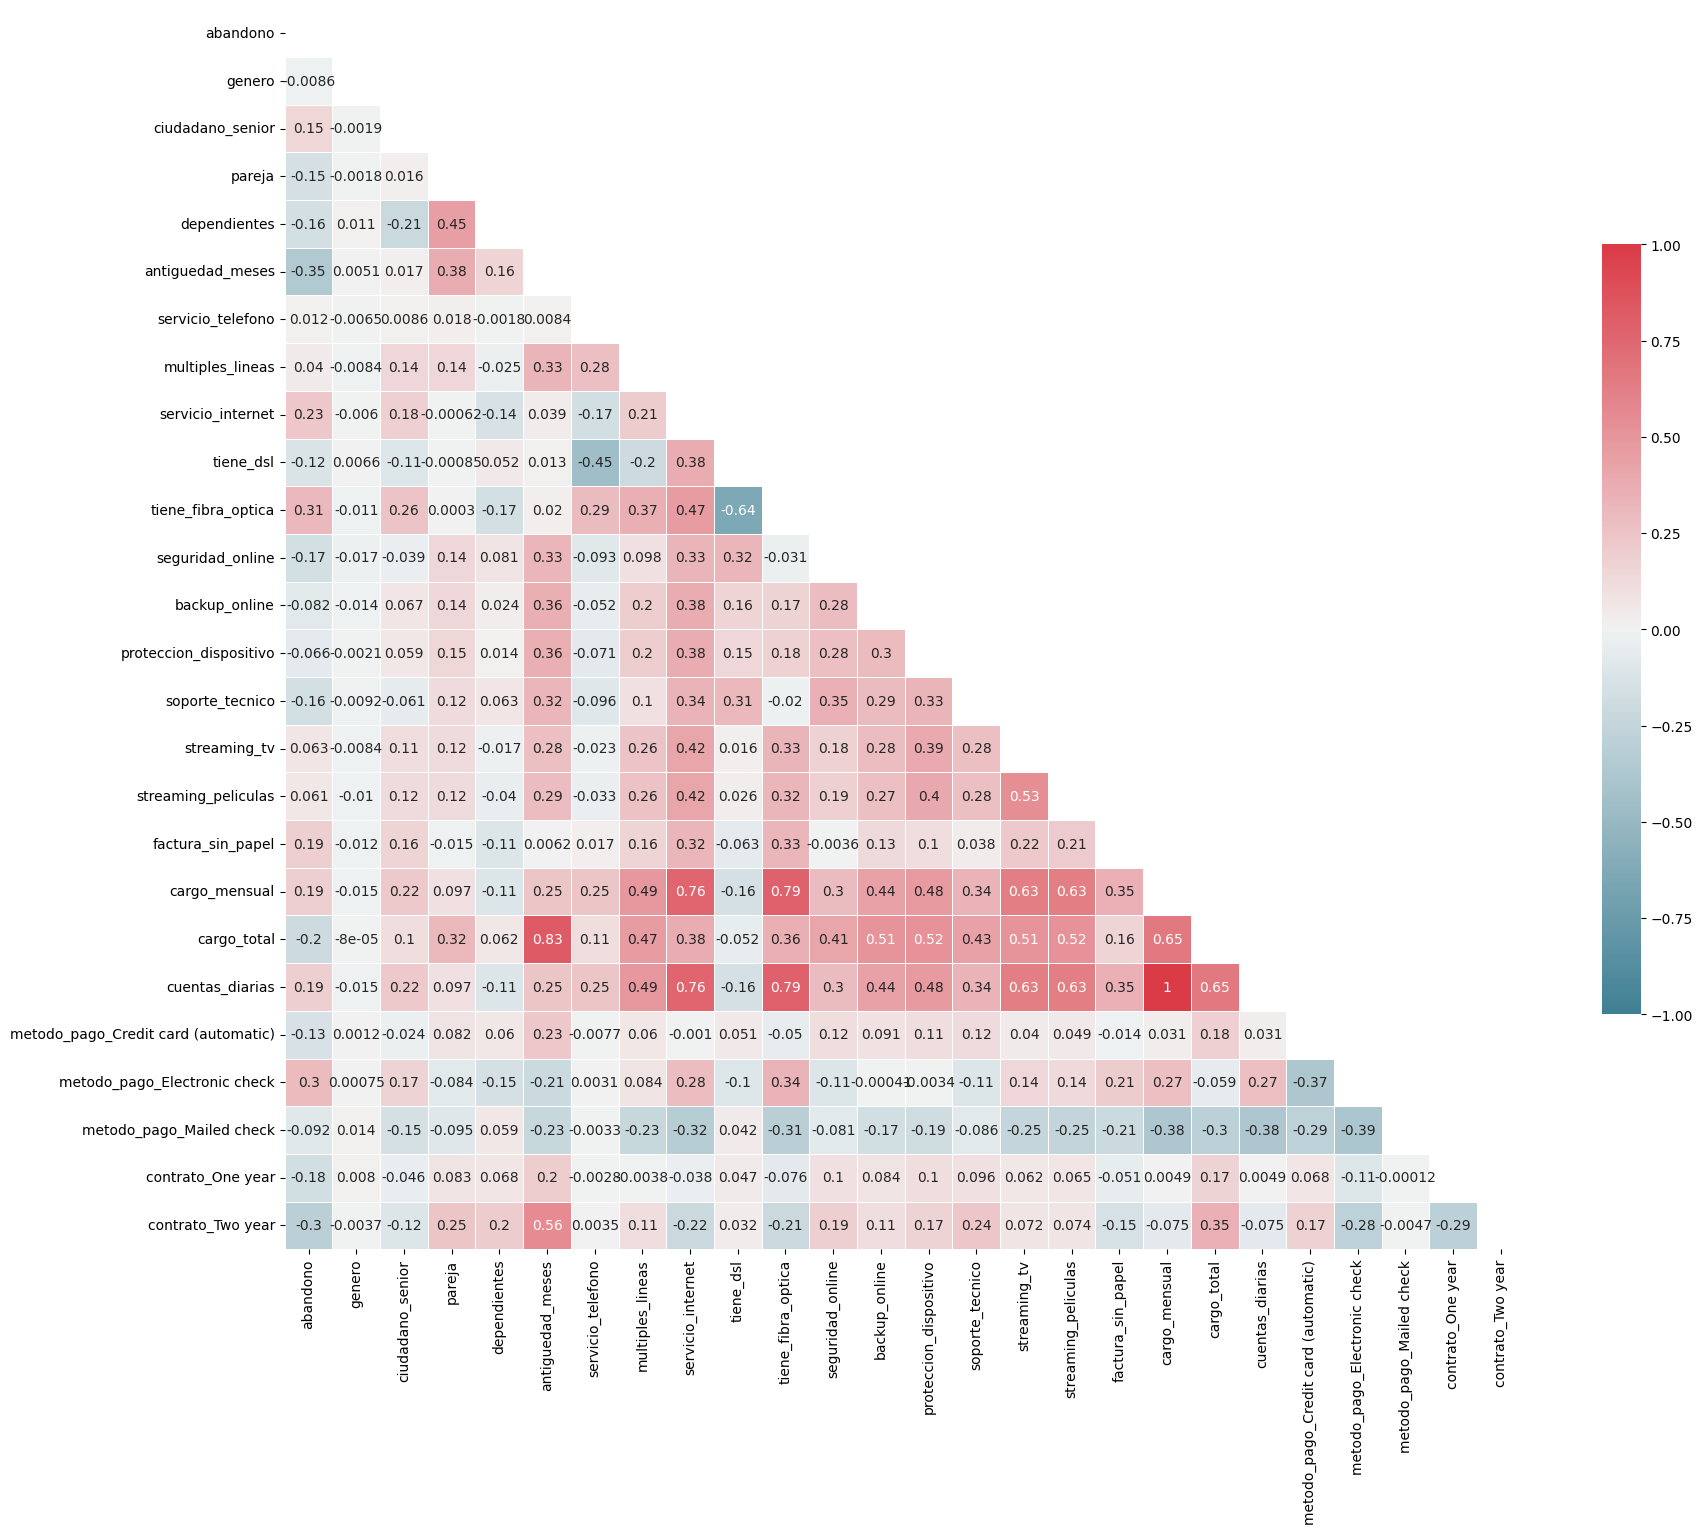

In [48]:
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(20, 20))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

## Análisis Dirigido

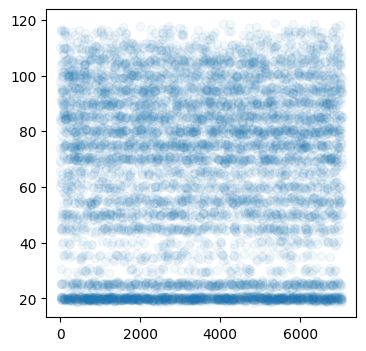

In [49]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(datos['cargo_mensual'], 'o', alpha=0.05)
plt.show()

In [50]:
px.box(datos_encoding, 
       x='cargo_mensual', 
       color='abandono', 
       title='Cargo total vs Abandono',
        width=600, height=400
       ).update_layout(
    title_font_size=20,
    xaxis_title_text='Cargo Total del Cliente',
    )

In [51]:
px.box(datos_encoding, 
       x='cuentas_diarias', 
       color='abandono', 
       title='Antiguedad vs Abandono',
        width=600, height=400
       ).update_layout(
    title_font_size=20,
    xaxis_title_text='Antiguedad del Cliente',
    )

# Modelado Predictivo

## Separación y Balanceo de Datos

In [52]:
# Separar X e y
x = datos_encoding_normalizado.drop("abandono", axis=1)
y = datos_encoding_normalizado["abandono"]

# Dividir en train y test (muy importante: SMOTE solo en train, nunca en test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# Aplicar SMOTE
#smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = SMOTE().fit_resample(x_train, y_train)

print("Antes de SMOTE:", y_train.value_counts(normalize=True).round(4)*100)
print("Después de SMOTE:", y_train_smote.value_counts(normalize=True).round(4)*100)

Antes de SMOTE: abandono
0    73.46
1    26.54
Name: proportion, dtype: float64
Después de SMOTE: abandono
0    50.0
1    50.0
Name: proportion, dtype: float64


## Creación de Modelos

### Modelo Baseline

In [60]:
dummy = DummyClassifier()
dummy.fit(x_train_smote, y_train_smote)
dummy.score(x_test, y_test)

0.7345635202271115

### Modelo Regresión Logística

In [63]:
from sklearn.linear_model import LogisticRegression

modelo_logistico = LogisticRegression(
    solver='liblinear',  
    penalty='l2',
    C=1.0,
    random_state=42,
    max_iter=1000
)

modelo_logistico.fit(x_train_smote, y_train_smote)
modelo_logistico.score(x_test, y_test)


0.7501774308019872

### Modelo Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

modelo_random_forest = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1  # Usar todos los procesadores disponibles
)

modelo_random_forest.fit(x_train_smote, y_train_smote)
modelo_random_forest.score(x_test, y_test)

0.7686302342086586

## Evaluación de los Modelos

### Regresión Logística

La precisión (precision) es de: 0.52
La sensibilidad (recall) es de: 0.77
El f1-score es de: 0.62
La Exactitud es de: 0.75


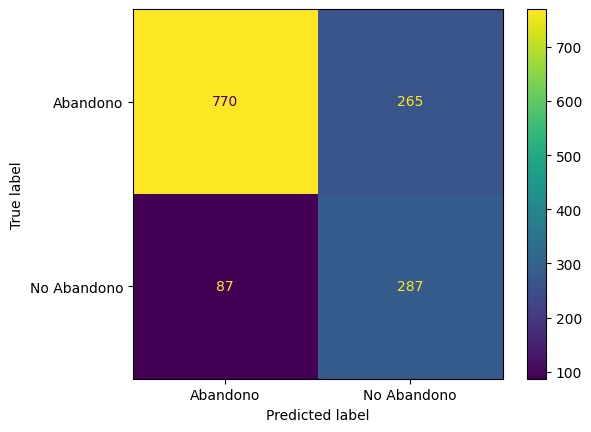

In [87]:
y_previsto = modelo_logistico.predict(x_test)
matriz_confusion = confusion_matrix(y_test,y_previsto)

print(f'La precisión (precision) es de: {round(precision_score(y_test, y_previsto), 2)}')
print(f'La sensibilidad (recall) es de: {round(recall_score(y_test, y_previsto),2)}')
print(f'El f1-score es de: {round(f1_score(y_test, y_previsto),2)}')
print(f'La Exactitud es de: {round(accuracy_score(y_test, y_previsto),2)}')
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto, display_labels=['Abandono','No Abandono']);


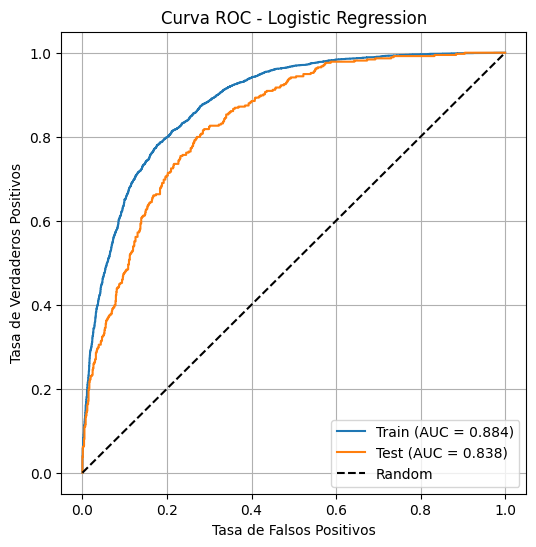

In [80]:

y_train_pred = modelo_logistico.predict(x_train_smote)
y_train_proba = modelo_logistico.predict_proba(x_train_smote)[:, 1]

# Predicciones en conjunto de prueba
y_test_pred = modelo_logistico.predict(x_test)
y_test_proba = modelo_logistico.predict_proba(x_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train_smote, y_train_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

# Graficar curvas ROC
plt.figure(figsize=(6, 6))
plt.plot(fpr_train, tpr_train, label=f'Train (AUC = {roc_auc_score(y_train_smote, y_train_proba):.3f})')
plt.plot(fpr_test, tpr_test, label=f'Test (AUC = {roc_auc_score(y_test, y_test_proba):.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

### Random Forest

La precisión (precision) es de: 0.55
La sensibilidad (recall) es de: 0.66
El f1-score es de: 0.6
La exactitud (accuracy) es de: 0.77
[[838 197]
 [129 245]]


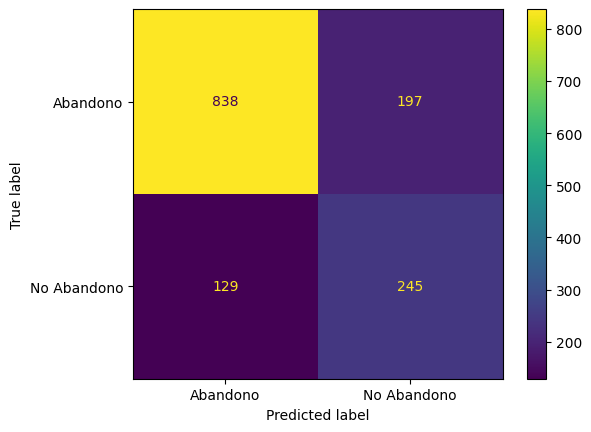

In [88]:
y_previsto = modelo_random_forest.predict(x_test)
matriz_confusion = confusion_matrix(y_test,y_previsto)

print(f'La precisión (precision) es de: {round(precision_score(y_test, y_previsto), 2)}')
print(f'La sensibilidad (recall) es de: {round(recall_score(y_test, y_previsto),2)}')
print(f'El f1-score es de: {round(f1_score(y_test, y_previsto),2)}')
print(f'La exactitud (accuracy) es de: {round(accuracy_score(y_test, y_previsto),2)}')
print(matriz_confusion)
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto, display_labels=['Abandono','No Abandono']);

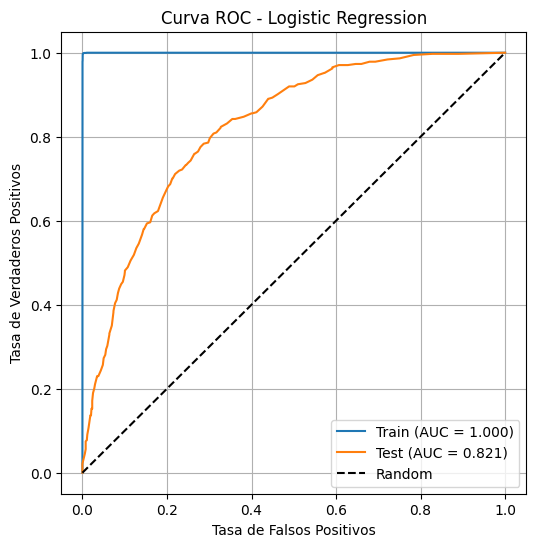

In [83]:
y_train_pred = modelo_random_forest.predict(x_train_smote)
y_train_proba = modelo_random_forest.predict_proba(x_train_smote)[:, 1]

# Predicciones en conjunto de prueba
y_test_pred = modelo_random_forest.predict(x_test)
y_test_proba = modelo_random_forest.predict_proba(x_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train_smote, y_train_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

# Graficar curvas ROC
plt.figure(figsize=(6, 6))
plt.plot(fpr_train, tpr_train, label=f'Train (AUC = {roc_auc_score(y_train_smote, y_train_proba):.3f})')
plt.plot(fpr_test, tpr_test, label=f'Test (AUC = {roc_auc_score(y_test, y_test_proba):.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

### Análisis Crítico

El modelo con mejor desempeño fue **Random Forest**, mostrando una diferencia en F1-Score de **0.0119** respecto a la Regresión Logística.  

En cuanto al análisis de overfitting y underfitting, la **Regresión Logística** presenta una diferencia de precisión entre entrenamiento y prueba de **0.0476**, lo que indica una buena generalización al mantener un desempeño equilibrado en ambos conjuntos. Por otro lado, **Random Forest** muestra una diferencia considerable de **0.2298**, lo que evidencia un posible caso de overfitting, ya que el modelo funciona un 22.98% mejor en el entrenamiento que en la prueba. Entre las causas más probables se encuentran árboles demasiado profundos, un número insuficiente de datos o un valor bajo en `n_estimators`. Para mitigar este problema, se sugiere limitar la profundidad máxima (`max_depth`), aumentar los valores de `min_samples_split` y `min_samples_leaf`, así como aplicar mayor regularización.  

En el análisis de underfitting, tanto la **Regresión Logística** como **Random Forest** no muestran señales de presentar este problema, por lo que ambos modelos logran capturar adecuadamente los patrones de los datos.  

Finalmente, se recomienda utilizar **Random Forest en producción**, considerando también la posibilidad de implementar un **ensemble** que combine ambos modelos. Además, sería conveniente aplicar validación cruzada para obtener resultados más robustos y monitorear continuamente el rendimiento con datos nuevos.  


# Interpretación y Conclusiones

## Análisis de la Importancia de las Variables

In [ ]:
# --- Regresión Logística: Coeficientes ---
coeficientes = pd.DataFrame({
    'Variable': x_train_smote.columns,
    'Coeficiente': modelo_logistico.coef_[0]
}).sort_values(by='Coeficiente', key=abs, ascending=False)

print("Coeficientes Regresión Logística:")
print(coeficientes.head(10))  # muestra las 10 más relevantes


# --- Random Forest: Importancia de variables ---
importancias = pd.DataFrame({
    'Variable': x_train_smote.columns,
    'Importancia': modelo_random_forest.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("\nImportancia de variables en Random Forest:")
print(importancias.head(10))  # muestra las 10 más relevantes


# --- Comparación en una sola tabla ---
comparacion = coeficientes.merge(importancias, on="Variable", how="inner")
comparacion = comparacion.sort_values(by="Importancia", ascending=False)

print("\nComparación de variables (Logística vs Random Forest):")
print(comparacion.head(10))


Coeficientes Regresión Logística:
              Variable  Coeficiente
17       cargo_mensual     6.657059
19     cuentas_diarias     6.657059
4     antiguedad_meses    -3.869370
9   tiene_fibra_optica    -3.286118
5    servicio_telefono    -3.173952
18         cargo_total     2.979989
24   contrato_Two year    -1.682920
7    servicio_internet    -1.664540
13     soporte_tecnico    -1.366521
10    seguridad_online    -1.234286

Importancia de variables en Random Forest:
                        Variable  Importancia
4               antiguedad_meses     0.163419
18                   cargo_total     0.134141
19               cuentas_diarias     0.119987
17                 cargo_mensual     0.114886
24             contrato_Two year     0.072452
9             tiene_fibra_optica     0.048168
23             contrato_One year     0.043086
10              seguridad_online     0.029332
13               soporte_tecnico     0.027024
21  metodo_pago_Electronic check     0.026057

Comparación de vari

El análisis de los modelos de **Regresión Logística** y **Random Forest** revela que los factores más determinantes en la cancelación de clientes son los costos asociados y el tiempo de permanencia. Las variables **cargo mensual**, **cargo total** y **cuentas diarias** muestran una fuerte relación positiva con la probabilidad de cancelación, mientras que la **antigüedad en meses** actúa como factor protector, reduciendo el riesgo de abandono.

Asimismo, el tipo de **contrato** y los servicios adicionales como **soporte técnico** y **seguridad online** contribuyen a retener a los clientes, aunque con menor intensidad que los factores económicos y de permanencia. El método de pago “Electronic check” también se asocia con un ligero aumento en el riesgo de cancelación.  

En conjunto, estos hallazgos sugieren que los clientes con altos cargos y baja antigüedad deben ser priorizados en estrategias de retención, mientras que fomentar contratos a largo plazo y fortalecer los servicios adicionales puede ayudar a disminuir la cancelación y mejorar la fidelidad del cliente.


## Conclusión

### Informe sobre factores que influyen en la cancelación de clientes

El análisis realizado utilizando los modelos de **Regresión Logística** y **Random Forest** permitió identificar los factores más relevantes que influyen en la cancelación de clientes y evaluar el desempeño de ambos enfoques para estimar la retención. En términos de rendimiento, la Regresión Logística obtuvo una exactitud de 0.75, con precisión de 0.52, sensibilidad de 0.77 y un F1-score de 0.62. Esto indica que el modelo es más eficaz para identificar clientes que realmente cancelan, priorizando la sensibilidad aunque generando un mayor número de falsos positivos. Por su parte, el Random Forest alcanzó una exactitud de 0.77, con precisión de 0.55, sensibilidad de 0.66 y F1-score de 0.6, ofreciendo un desempeño más equilibrado, aunque detectando menos cancelaciones que la regresión logística.  

En cuanto a las variables más influyentes, ambos modelos coinciden en que el **cargo mensual** y las **cuentas diarias** se asocian fuertemente con una mayor probabilidad de cancelación, mientras que la **antigüedad en meses** actúa como un factor protector, reduciendo la probabilidad de abandono a medida que el cliente lleva más tiempo con la compañía. Además, los contratos a largo plazo, especialmente de dos años, disminuyen la cancelación, indicando que los compromisos prolongados ayudan a retener a los clientes. Otros factores relevantes incluyen el uso de **fibra óptica**, que se relaciona con un mayor riesgo de cancelación, y el método de pago **Electronic check**, que también incrementa la probabilidad de abandono, posiblemente por cuestiones de confianza o conveniencia.  

A partir de estos resultados se pueden proponer diversas estrategias de retención. Es recomendable revisar los precios y diseñar planes personalizados que reduzcan la percepción de altos costos para los clientes con cargos mensuales elevados o uso intensivo de servicios. Para los clientes con baja antigüedad, conviene implementar programas de fidelización temprana, con beneficios y promociones que incentiven la permanencia. Promover contratos a largo plazo mediante descuentos o ventajas adicionales también puede reducir la cancelación. Adicionalmente, se sugiere fortalecer la experiencia de los clientes con servicios de fibra óptica, mediante seguimiento de calidad y soporte proactivo, y ofrecer alternativas de pago más seguras y cómodas para aquellos que utilizan Electronic check. Estas acciones, basadas en los resultados obtenidos, permitirán mejorar la retención y minimizar la probabilidad de cancelación.
